In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cab_data = pd.read_csv(r"C:\Users\mseny\OneDrive\Masaüstü\data glacier internship\week-2\DataSets\Cab_Data.csv")
df_city = pd.read_csv(r"C:\Users\mseny\OneDrive\Masaüstü\data glacier internship\week-2\DataSets\City.csv")
df_customer_id = pd.read_csv(r"C:\Users\mseny\OneDrive\Masaüstü\data glacier internship\week-2\DataSets\Customer_ID.csv")
df_transaction_id = pd.read_csv(r"C:\Users\mseny\OneDrive\Masaüstü\data glacier internship\week-2\DataSets\Transaction_ID.csv")


In [4]:
def col_names(dataframe_list):
    for df in dataframe_list:
        print(f"Columns for {df.name}:\n{df.columns}\n")


df_cab_data.name = 'df_cab_data'
df_city.name = 'df_city'
df_customer_id.name = 'df_customer_id'
df_transaction_id.name = 'df_transaction_id'

df_list = [df_cab_data, df_city, df_customer_id, df_transaction_id]


col_names(df_list)


Columns for df_cab_data:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

Columns for df_city:
Index(['City', 'Population', 'Users'], dtype='object')

Columns for df_customer_id:
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

Columns for df_transaction_id:
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')



In [5]:
import pandas as pd
merged_df = pd.merge(df_cab_data,df_city,on="City",how="inner")
merged_df = pd.merge(merged_df,df_transaction_id,on="Transaction ID", how="inner")
df  = pd.merge(merged_df,df_customer_id,on="Customer ID",how="inner")

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Uniques #####################")
    unique_values={column:dataframe[column].unique() for column in dataframe.columns if dataframe[column].dtype=="object"}
    print(unique_values)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
 

In [7]:
check_df(df)

##################### Shape #####################
(359392, 14)
##################### Types #####################
Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object
##################### Uniques #####################
{'Company': array(['Pink Cab', 'Yellow Cab'], dtype=object), 'City': array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object

In [8]:
import pandas as pd


df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], origin='1899-12-30', unit='D')


print(df['Date of Travel'].head())


0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]


In [9]:

df['Users'] = df['Users'].str.replace(',', '')  
df['Users'] = df['Users'].str.strip()  
df['Users'] = df['Users'].astype(int) 

df['Population'] = df['Population'].str.replace(',', '').astype(int)

df["Transaction ID"] = df["Transaction ID"].astype("category")

df['Customer ID'] = df['Customer ID'].astype('category')



#######################################################################################3

1-Which company has maximum cab users at a particular time period?
a-Monthly
b-Season

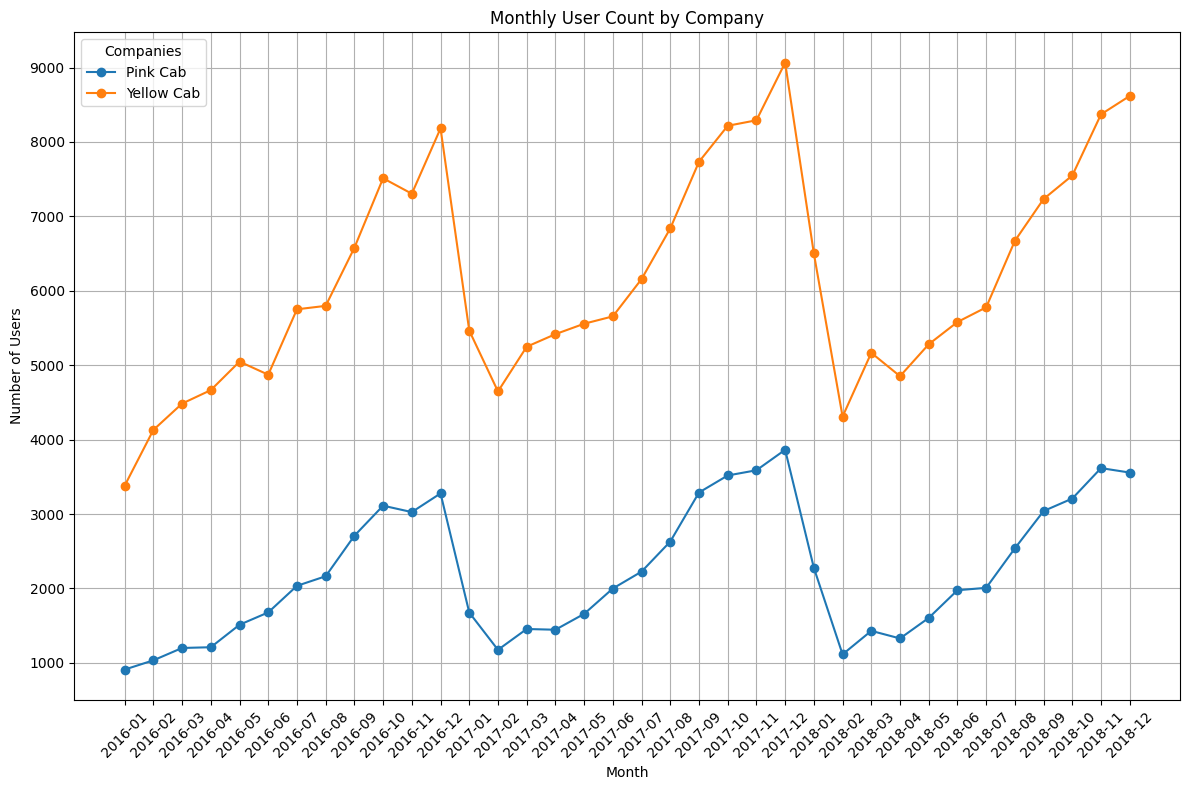

In [10]:

df['Month'] = pd.to_datetime(df['Date of Travel']).dt.to_period('M')


company_user_count_monthly = df.groupby(['Month', 'Company'])['Customer ID'].nunique().reset_index()


plt.figure(figsize=(12, 8))

for company in company_user_count_monthly['Company'].unique():
    subset = company_user_count_monthly[company_user_count_monthly['Company'] == company]
    plt.plot(subset['Month'].astype(str), subset['Customer ID'], marker='o', label=company)

plt.title("Monthly User Count by Company")
plt.xlabel("Month")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()


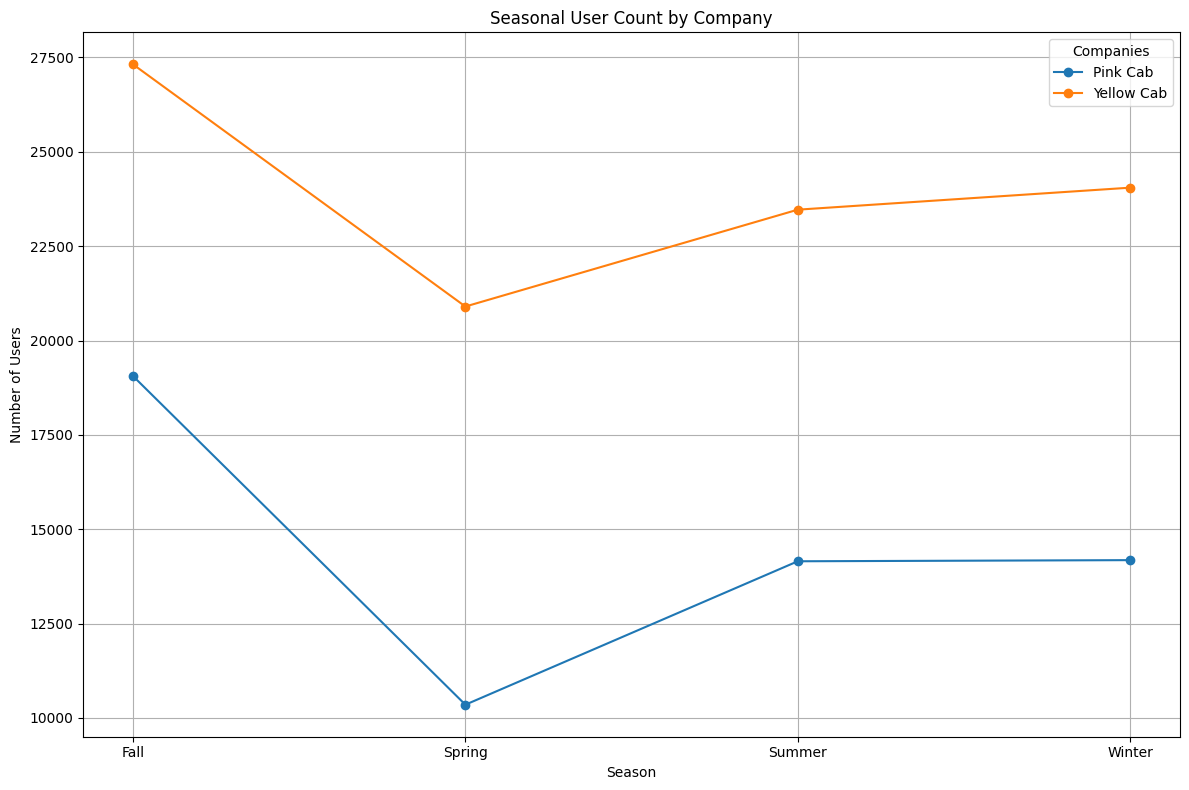

In [11]:
def get_season(date):
    month=date.month
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Fall"
df["Season"] =df["Date of Travel"].apply(get_season)  
seasonal_user_count = df.groupby(["Company","Season"])["Customer ID"].nunique().reset_index()

plt.figure(figsize=(12, 8))

for company in seasonal_user_count['Company'].unique():
    subset = seasonal_user_count[seasonal_user_count['Company'] == company]
    plt.plot(subset['Season'], subset['Customer ID'], marker='o', label=company)

plt.title("Seasonal User Count by Company")
plt.xlabel("Season")
plt.ylabel("Number of Users")
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()

2-Does margin proportionally increase with increase in number of customers?

In [12]:
df["Net Profit"] = df["Price Charged"]-df["Cost of Trip"]


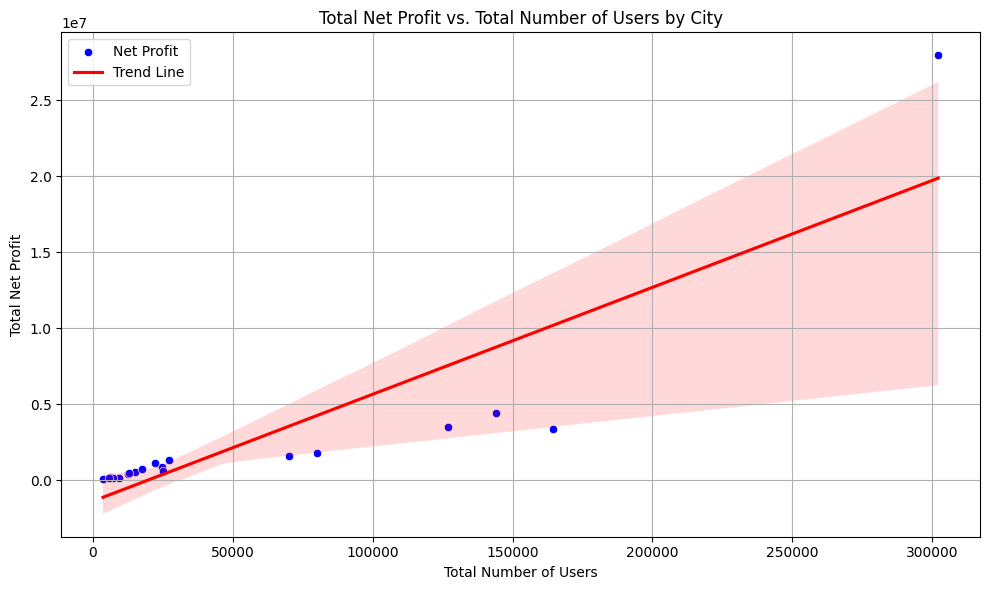

In [13]:



city_net_profit = df.groupby('City')['Net Profit'].sum().reset_index()


city_users = df.groupby('City')['Users'].first().reset_index()


city_summary = pd.merge(city_net_profit, city_users, on='City')



plt.figure(figsize=(10, 6))
sns.scatterplot(x='Users', y='Net Profit', data=city_summary, color='blue', label='Net Profit')
sns.regplot(x='Users', y='Net Profit', data=city_summary, scatter=False, color='red', label='Trend Line')
plt.title('Total Net Profit vs. Total Number of Users by City')
plt.xlabel('Total Number of Users')
plt.ylabel('Total Net Profit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



3-What are the attributes of these customer segments?

a-age

  Age Group  KM Travelled    Net Profit
0     18-24    1836553.37  1.127211e+07
1     25-34    2590058.87  1.569243e+07
2     35-44    1857302.85  1.131357e+07
3     45-54     892880.02  5.523110e+06
4     55-64     858711.16  5.128534e+06
5       65+      74984.31  3.979541e+05
ANOVA Test for KM Travelled: F-statistic = 1.4859009776527223, p-value = 0.1906092601568084
ANOVA Test for Net Profit: F-statistic = 16.503495089979463, p-value = 2.504947461150842e-16


C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\2525533645.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='KM Travelled', data=age_group_summary, palette='viridis')


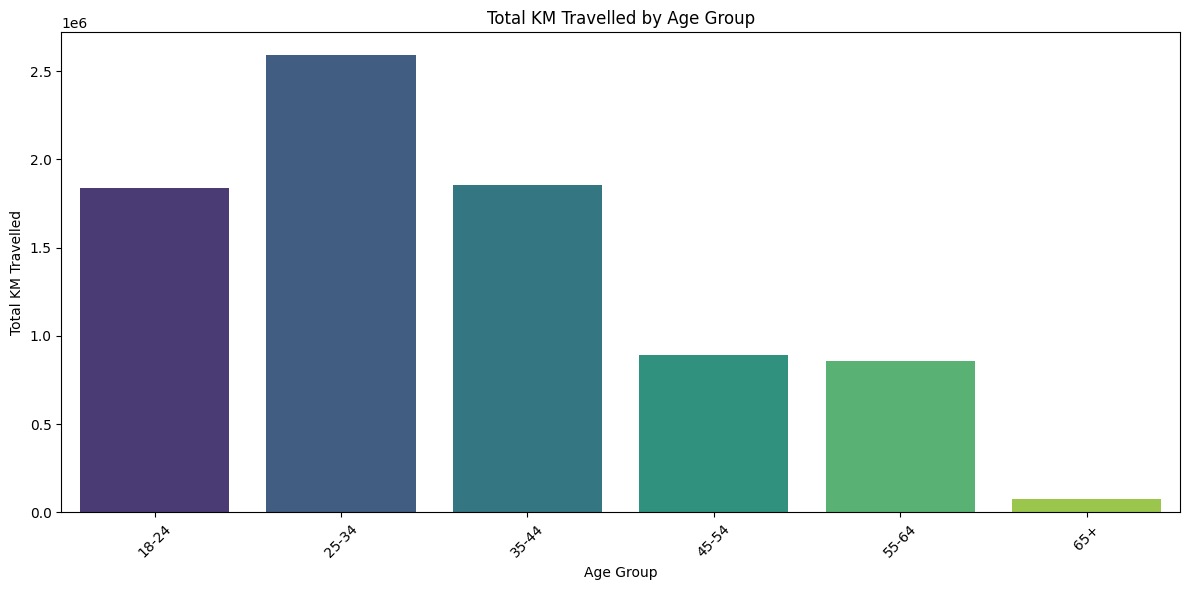

C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\2525533645.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Net Profit', data=age_group_summary, palette='viridis')


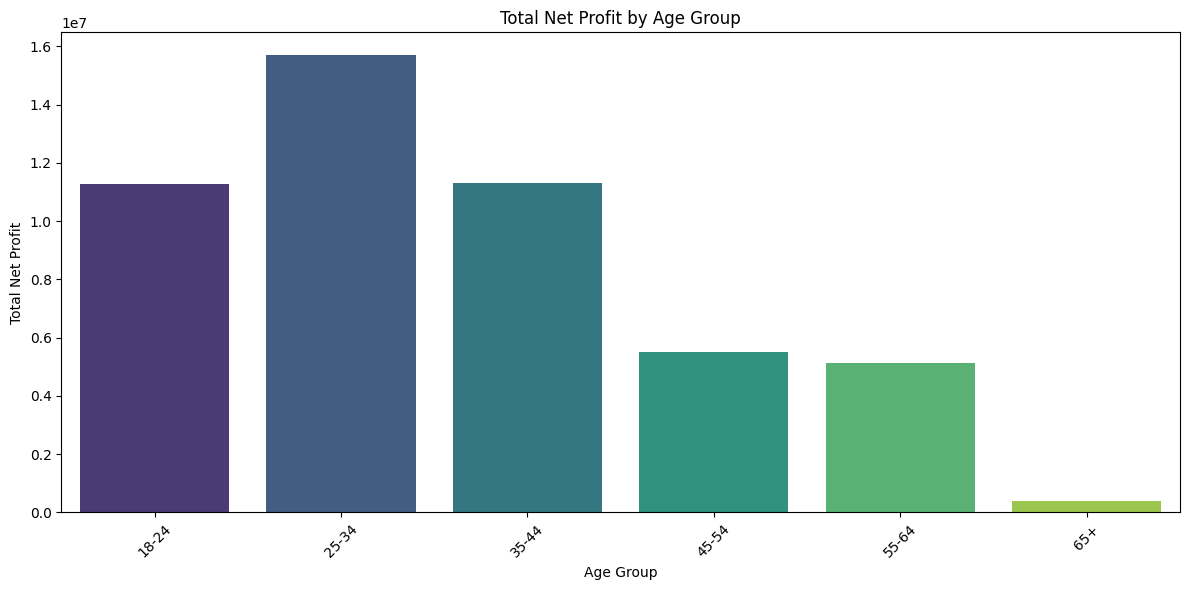

In [14]:

from scipy.stats import f_oneway

def age_group(age):
    if 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    else:
        return '65+'

df['Age Group'] = df['Age'].apply(age_group)


age_group_summary = df.groupby('Age Group').agg({
    'KM Travelled': 'sum',
    'Net Profit': 'sum'
}).reset_index()

print(age_group_summary)

groups_km = [group['KM Travelled'].values for name, group in df.groupby('Age Group')]
groups_profit = [group['Net Profit'].values for name, group in df.groupby('Age Group')]


anova_km = f_oneway(*groups_km)
anova_profit = f_oneway(*groups_profit)

print(f"ANOVA Test for KM Travelled: F-statistic = {anova_km.statistic}, p-value = {anova_km.pvalue}")
print(f"ANOVA Test for Net Profit: F-statistic = {anova_profit.statistic}, p-value = {anova_profit.pvalue}")


plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='KM Travelled', data=age_group_summary, palette='viridis')
plt.title('Total KM Travelled by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total KM Travelled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Net Profit', data=age_group_summary, palette='viridis')
plt.title('Total Net Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Net Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


b-income

In [15]:
income_stats = df['Income (USD/Month)'].describe()
print(income_stats)

q1 = df['Income (USD/Month)'].quantile(0.25)
q2 = df['Income (USD/Month)'].quantile(0.50)
q3 = df['Income (USD/Month)'].quantile(0.75)

print(f"Q1: {q1}, Median: {q2}, Q3: {q3}")


def income_group(income):
    if income <= q1:
        return 'Low'
    elif income <= q2:
        return 'Medium'
    elif income <= q3:
        return 'High'
    else:
        return 'Very High'

df['Income Group'] = df['Income (USD/Month)'].apply(income_group)


income_group_summary = df.groupby('Income Group').agg({
    'Income (USD/Month)': 'mean',  
    'Customer ID': 'count'  
}).reset_index()

print(income_group_summary)


count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64
Q1: 8424.0, Median: 14685.0, Q3: 21035.0
  Income Group  Income (USD/Month)  Customer ID
0         High        17849.344044        89852
1          Low         5185.151799        89869
2       Medium        11563.080170        89859
3    Very High        25604.552666        89812


In [16]:

q1 = df['Income (USD/Month)'].quantile(0.25)
q2 = df['Income (USD/Month)'].quantile(0.50)
q3 = df['Income (USD/Month)'].quantile(0.75)

print(f"Q1: {q1}, Median: {q2}, Q3: {q3}")


def income_group(income):
    if income <= q1:
        return 'Low'
    elif income <= q2:
        return 'Medium'
    elif income <= q3:
        return 'High'
    else:
        return 'Very High'

df['Income Group'] = df['Income (USD/Month)'].apply(income_group)

income_group_summary = df.groupby('Income Group').agg({
    'Income (USD/Month)': 'mean',  # Ortalama gelir
    'Customer ID': 'count'  # Müşteri sayısı
}).reset_index()

print(income_group_summary)


Q1: 8424.0, Median: 14685.0, Q3: 21035.0
  Income Group  Income (USD/Month)  Customer ID
0         High        17849.344044        89852
1          Low         5185.151799        89869
2       Medium        11563.080170        89859
3    Very High        25604.552666        89812


In [17]:
income_group_summary = df.groupby('Income Group')['Net Profit'].agg(['mean', 'sum']).reset_index()
print(income_group_summary)

  Income Group        mean           sum
0         High  139.611181  1.254434e+07
1          Low  135.065655  1.213822e+07
2       Medium  136.697630  1.228351e+07
3    Very High  137.638957  1.236163e+07


C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\3868944902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Group', y='mean', data=income_group_summary, palette='viridis')


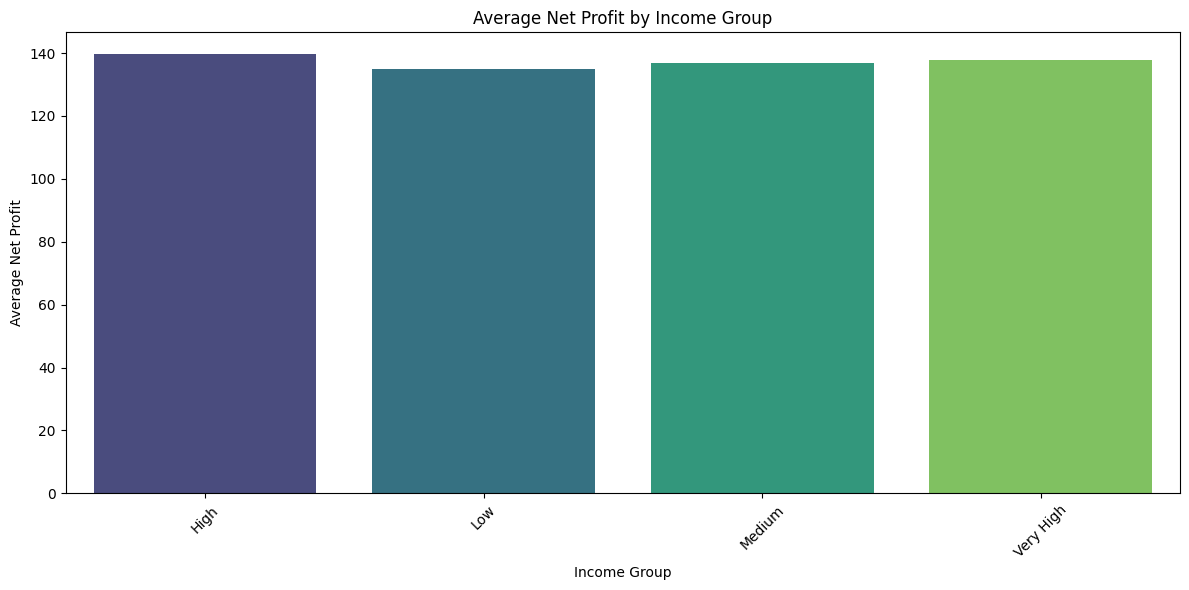

C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\3868944902.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Group', y='sum', data=income_group_summary, palette='viridis')


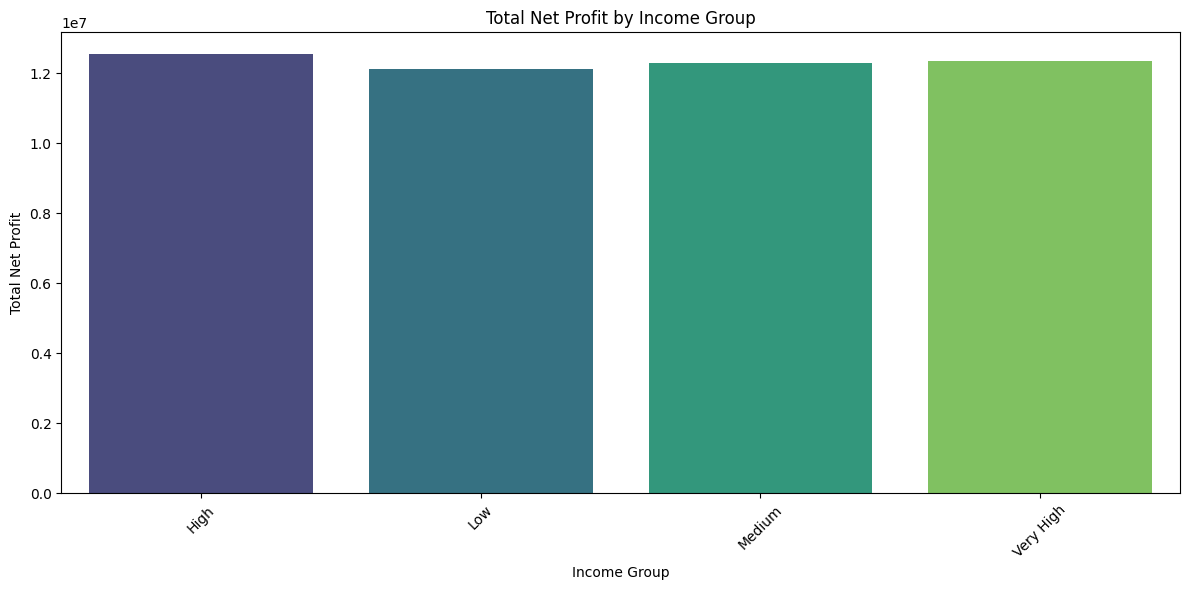

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x='Income Group', y='mean', data=income_group_summary, palette='viridis')
plt.title('Average Net Profit by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Net Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Income Group', y='sum', data=income_group_summary, palette='viridis')
plt.title('Total Net Profit by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total Net Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c-gender

   Gender  Price Charged    Net Profit
0  Female    64372516.78  2.046195e+07
1    Male    87809621.74  2.886575e+07


C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\885599069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Price Charged', data=gender_summary, palette='viridis')


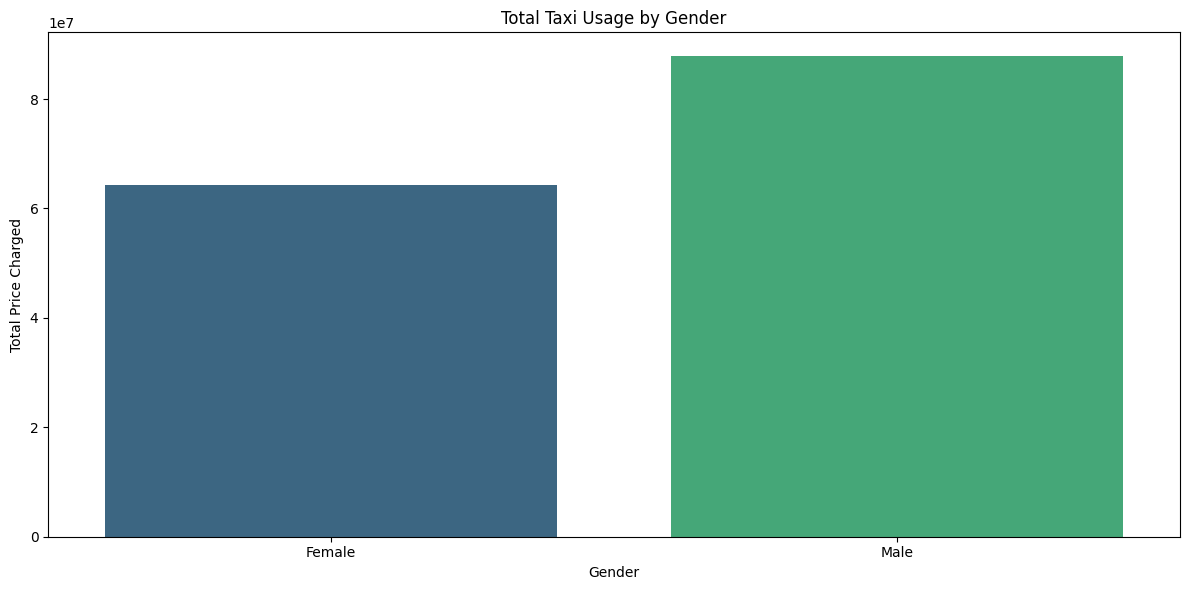

C:\Users\mseny\AppData\Local\Temp\ipykernel_12564\885599069.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Net Profit', data=gender_summary, palette='viridis')


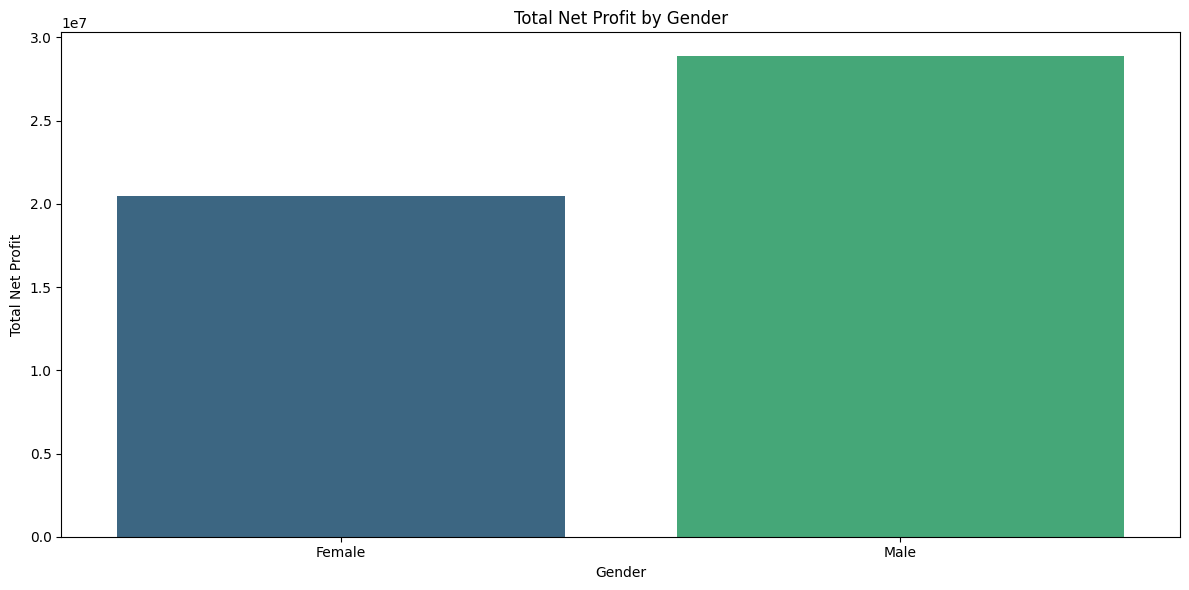

In [19]:


gender_summary = df.groupby('Gender').agg({'Price Charged': 'sum', 'Net Profit': 'sum'}).reset_index()
print(gender_summary)


plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Price Charged', data=gender_summary, palette='viridis')
plt.title('Total Taxi Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price Charged')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Net Profit', data=gender_summary, palette='viridis')
plt.title('Total Net Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Net Profit')
plt.tight_layout()
plt.show()


d- gender and payment mode

Payment_Mode    Card   Cash
Gender                     
Female         92025  61455
Male          123479  82433


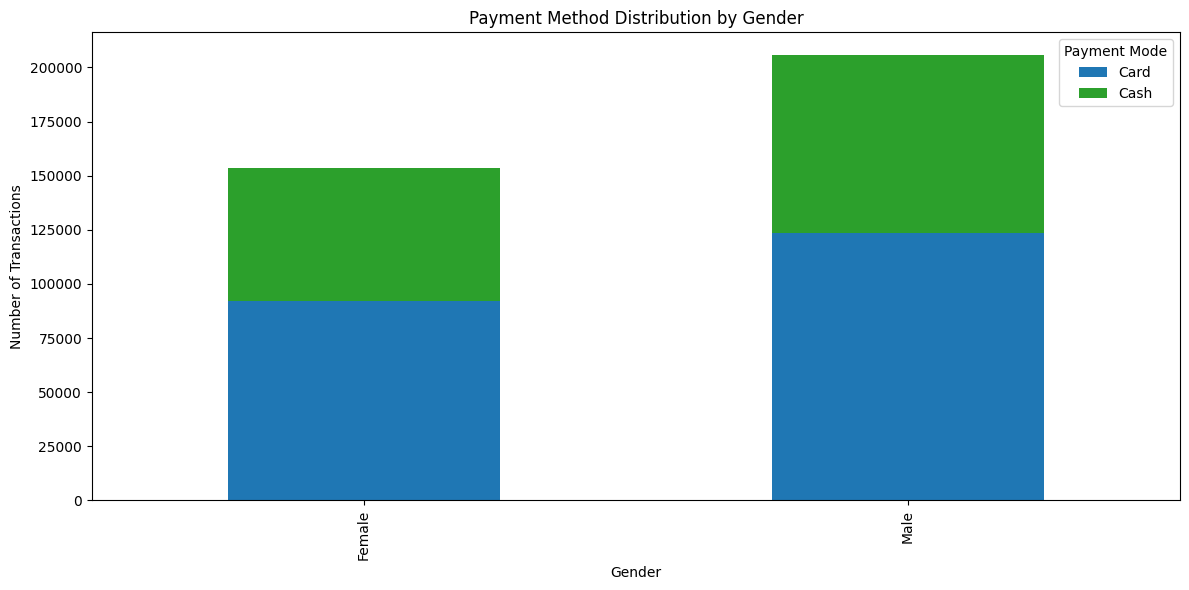

In [21]:
payment_mode_gender_summary = df.groupby(['Gender', 'Payment_Mode']).size().unstack().fillna(0)
print(payment_mode_gender_summary)


colors = ['#1f77b4', '#2ca02c']  # Blue and Green

payment_mode_gender_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Payment Method Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Mode')
plt.tight_layout()
plt.show()